In [ ]:
from google.colab import drive  
drive.mount('/content/gdrive') 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
df=pd.read_csv('gdrive/My Drive/Msc/results-2021-cefas-website-phy-tab.csv') 
df

Mounted at /content/gdrive


,Phytoplankton Monitoring Programme results,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessot...,Prorocentrum cordatum \ncells L-1\n(Venerupin),NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,04/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,04/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,05/01/2021,ND,ND,ND,400,ND,ND,ND,NaN,NaN
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,05/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,Alexandrium spp. (PSP) - 40 cells/litre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894,Dinophysiaceae/Prorocentrum lima (DSP) - 100 c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
895,"Pseudo-nitzschia spp. (ASP) - 150,000 cells/litre",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
896,Phytoplankton cell count ? trigger Level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_header = df.iloc[0] #grab the first row for the header 
df = df[1:] #take the data less the header row 
df.columns = new_header #set the header row as the df header 
df = df[:828] 
df

,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin),NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,04/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,04/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,05/01/2021,ND,ND,ND,400,ND,ND,ND,NaN,NaN
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,05/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
5,5/21,Blackwater,B14AD,Maldon DC,TM04060768,St Peters Flats,06/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,853/21,St Austell Bay,B70AE,Cornwall PHA,SX05744972,Ropehaven Outer,25/10/2021,ND,40,ND,7080,ND,ND,ND,NaN,NaN
825,854/21,Crouch,B015Y,Maldon DC,TQ90429738,Althorne,26/10/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
826,855/21,Lyme Bay,B090M,Torbay BC,UNVERIFIED,Site 1,25/10/2021,ND,40,ND,ND,ND,ND,ND,NaN,NaN
827,856/21,Burry Inlet,B038I,City and Council of Swansea,SS50509590,South East 4,27/10/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN


In [ ]:
#ND means "not detected", the value can be imputed to "0"
#Convert numeric columns read by pandas as string from string to integers

def clean_data(df): 
  df["Alexandrium spp. \ncells L-1\n(PSP)"] = df["Alexandrium spp. \ncells L-1\n(PSP)"].replace("ND", 0) 
  df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].replace("ND", 0) 
  df["Dinophysiaceae \ncells L-1\n(DSP)"] = df["Dinophysiaceae \ncells L-1\n(DSP)"].replace("ND", 0) 
  df["Prorocentrum lima \ncells L-1\n(DSP)"] = df["Prorocentrum lima \ncells L-1\n(DSP)"].replace("ND", 0)   
   
  df["Alexandrium spp. \ncells L-1\n(PSP)"] = pd.to_numeric(df["Alexandrium spp. \ncells L-1\n(PSP)"], errors='coerce') 
  df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = pd.to_numeric(df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "], errors='coerce')      
  df["Dinophysiaceae \ncells L-1\n(DSP)"] = pd.to_numeric(df["Dinophysiaceae \ncells L-1\n(DSP)"], errors='coerce')      
  df["Prorocentrum lima \ncells L-1\n(DSP)"] = pd.to_numeric(df["Prorocentrum lima \ncells L-1\n(DSP)"], errors='coerce')

  df["Alexandrium spp. \ncells L-1\n(PSP)"] = df["Alexandrium spp. \ncells L-1\n(PSP)"].fillna(-1) 
  df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].fillna(-1) 
  df["Dinophysiaceae \ncells L-1\n(DSP)"] = df["Dinophysiaceae \ncells L-1\n(DSP)"].fillna(-1) 
  df["Prorocentrum lima \ncells L-1\n(DSP)"] = df["Prorocentrum lima \ncells L-1\n(DSP)"].fillna(-1)


clean_data(df)

In [ ]:
thresholds = {
    "Alexandrium spp. \ncells L-1\n(PSP)" : 40, 
    "Dinophysiaceae \ncells L-1\n(DSP)" : 100, 
    "Prorocentrum lima \ncells L-1\n(DSP)" : 100, 
    "Pseudo-nitzschia spp. \ncells L-1\n(ASP) " : 150000
} 

In [ ]:
def check_thresholds(df): 
  t = [] 
  for i,j in enumerate(df["Sample number"]): 
     
    alexandrium = df.iloc[i]["Alexandrium spp. \ncells L-1\n(PSP)"]    
    pseudo_nitzschia = df.iloc[i]["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] 
    dinophysiaceae = df.iloc[i]["Dinophysiaceae \ncells L-1\n(DSP)"] 
    prorocentrum = df.iloc[i]["Prorocentrum lima \ncells L-1\n(DSP)"] 
     
    threshold_reached = 0 
    if pseudo_nitzschia >= thresholds["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]: 
      threshold_reached = 1 
    elif dinophysiaceae >= thresholds["Dinophysiaceae \ncells L-1\n(DSP)"]:
      threshold_reached = 1 
    elif prorocentrum >= thresholds["Prorocentrum lima \ncells L-1\n(DSP)"]: 
      threshold_reached = 1                
    elif alexandrium >= thresholds["Alexandrium spp. \ncells L-1\n(PSP)"]: 
      threshold_reached = 1                
       
    t.append(threshold_reached) 
     
  return t 

thresholds_reached = check_thresholds(df) 
df['thresholds_reached'] = thresholds_reached 
pd.DataFrame.to_csv(df, 'gdrive/My Drive/Msc/thresholds_cleaned.csv', sep=',', index=False)

In [ ]:
x = pd.read_csv('gdrive/My Drive/Msc/thresholds_cleaned.csv', usecols=["Pseudo-nitzschia spp. \ncells L-1\n(ASP) ", "Dinophysiaceae \ncells L-1\n(DSP)", "Prorocentrum lima \ncells L-1\n(DSP)", "Alexandrium spp. \ncells L-1\n(PSP)"], na_values = ['no info', '.']) 
y = pd.read_csv('gdrive/My Drive/Msc/thresholds_cleaned.csv', usecols=["thresholds_reached"]) 

In [ ]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.optimizers import * 
from keras.utils import np_utils 
model = Sequential() 
model.add(Dense(units=4000, activation='relu', input_shape=(4,))) 
model.add(Dropout(0.5))
model.add(Dense(units=1000, activation='relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(units=500, activation='relu')) 
model.add(Dropout(0.1))
model.add(Dense(units=50, activation='relu')) 
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary() 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4000)              20000     
                                                                 
 dropout (Dropout)           (None, 4000)              0         
                                                                 
 dense_1 (Dense)             (None, 1000)              4001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 500)               500500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                2

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

history = model.fit(x_train, y_train, 
                    batch_size=16, 
                    epochs=50, 
                    verbose=1, 
                    validation_data=(x_test, y_test)) 
score = model.evaluate(x_test, y_test, verbose=0) 
score_train = model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
print('Train loss', score_train[0])
print('Train accuracy', score_train[1])

Epoch 1/50
42/42 [==============================] - 3s 54ms/step - loss: 406.3881 - accuracy: 0.7946 - val_loss: 373.2981 - val_accuracy: 0.8916
Epoch 2/50
42/42 [==============================] - 2s 50ms/step - loss: 304.2019 - accuracy: 0.7296 - val_loss: 123.9109 - val_accuracy: 0.9217
Epoch 3/50
42/42 [==============================] - 2s 48ms/step - loss: 156.2708 - accuracy: 0.7326 - val_loss: 23.6453 - val_accuracy: 0.9217
Epoch 4/50
42/42 [==============================] - 2s 48ms/step - loss: 59.5723 - accuracy: 0.6737 - val_loss: 22.1185 - val_accuracy: 0.5181
Epoch 5/50
42/42 [==============================] - 2s 49ms/step - loss: 19.8425 - accuracy: 0.7508 - val_loss: 44.3172 - val_accuracy: 0.9337
Epoch 6/50
42/42 [==============================] - 2s 49ms/step - loss: 10.4134 - accuracy: 0.8323 - val_loss: 2.3502 - val_accuracy: 0.9277
Epoch 7/50
42/42 [==============================] - 2s 49ms/step - loss: 0.5964 - accuracy: 0.9139 - val_loss: 0.3372 - val_accuracy: 0.93

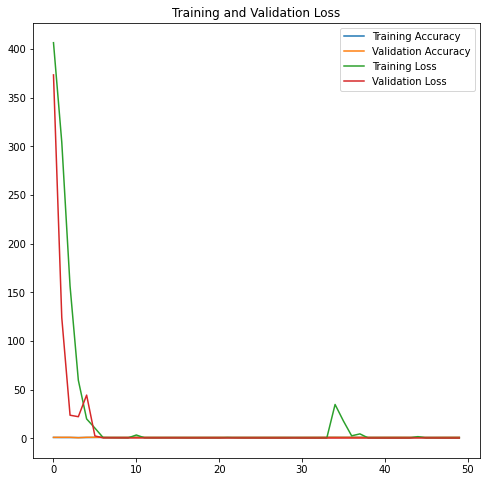

In [ ]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(50) 
plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show()